In [1]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



In [2]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

### Transition Matrix for an Undirected Network


8 x 8 sparse Matrix of class "dgCMatrix"


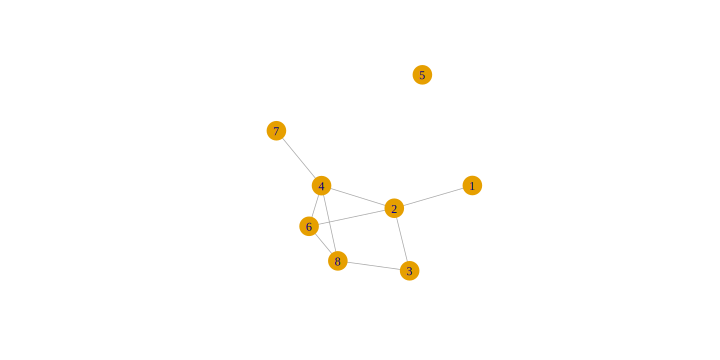

                                                                  
[1,] .    1.0000000 .         .         . .         .    .        
[2,] 0.25 .         0.2500000 0.2500000 . 0.2500000 .    .        
[3,] .    0.5000000 .         .         . .         .    0.5000000
[4,] .    0.2500000 .         .         . 0.2500000 0.25 0.2500000
[5,] .    .         .         .         1 .         .    .        
[6,] .    0.3333333 .         0.3333333 . .         .    0.3333333
[7,] .    .         .         1.0000000 . .         .    .        
[8,] .    .         0.3333333 0.3333333 . 0.3333333 .    .        


In [3]:
set.seed(0)
g = random.graph.game(8, 0.3)
plot(g)
print(create_transition_matrix(g))

### Transition Matrix for a Directed Network

8 x 8 sparse Matrix of class "dgCMatrix"


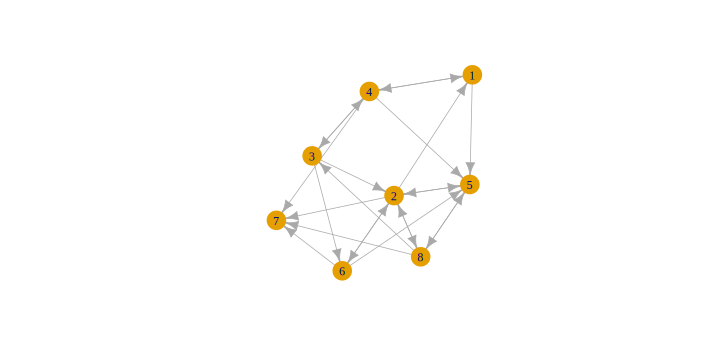

                                                                    
[1,] .    .         .    0.5000000 0.5000000 .         .         .  
[2,] 0.20 .         .    .         0.2000000 0.2000000 0.2000000 0.2
[3,] .    0.3333333 .    0.3333333 .         0.3333333 .         .  
[4,] 0.25 .         0.25 .         0.2500000 .         0.2500000 .  
[5,] .    0.5000000 .    .         .         .         .         0.5
[6,] .    0.3333333 .    .         0.3333333 .         0.3333333 .  
[7,] .    .         .    .         .         .         1.0000000 .  
[8,] .    0.2500000 0.25 .         0.2500000 .         0.2500000 .  


In [4]:
set.seed(1)
g = random.graph.game(8, 0.4, directed = T)
plot(g)
print(create_transition_matrix(g))

In [10]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [6]:
g = random.graph.game(8, 0.3)
print(create_transition_matrix(g)[1, ][3])

[1] 0


In [7]:
set.seed(1)
v_last = random_walk(g, 15, 1)

Step 1: 1
Step 2: 4
Step 3: 3
Step 4: 4
Step 5: 1
Step 6: 4
Step 7: 1
Step 8: 2
Step 9: 1
Step 10: 2
Step 11: 6
Step 12: 3
Step 13: 6
Step 14: 2
Step 15: 6


In [8]:
getShortest = function (g, start, last, transition_matrix){
    v = start
    q = list()
    dist = 0
    q = c(q, v)
    visited = list()
    visited = c(visited, v)
    while (length(q) != 0) {
        for (time in 1:length(q)) {
            v = q[[1]]
            q = q[-1] # deque
            # print (v)
            if (last == v) {
                print (last)
                print (v)
                return(dist)
            }
            neighbors = transition_matrix[v, ]
            for (i in 1:length(neighbors)) {
                if (neighbors[i] > 0 && !(i %in% visited)) {
                    q = c(q, i) # enqueue
                    visited = c(visited, i)
                }
            }
        }
        dist = dist + 1
    }
}

In [26]:
# 1 a
g = erdos.renyi.game(10000, 0.01, directed=FALSE)
transition_matrix = create_transition_matrix(g)



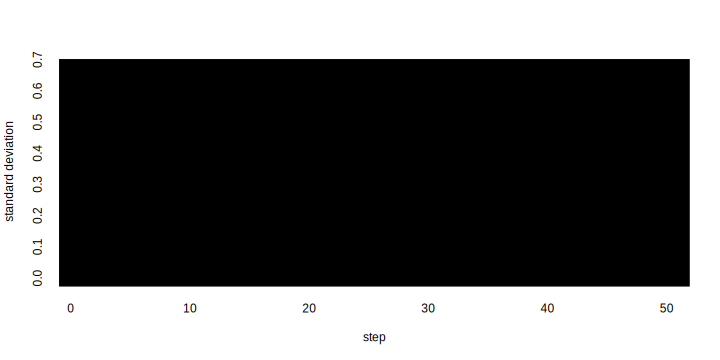

In [27]:
#1 b
average = rep(NA, 50)
sd = rep(NA, 50)
for (t in 1:50) {
  sPath = rep(NA, 10)
  for (walk in 1:10) {
    start = sample(1:10000, 1)
    last = random_walk(g, t, start) # last node
    temp = shortest_paths(g, from = start, to = last)
    sPath[walk] = length(temp$vpath[[1]]) - 1
    # sPath[walk] = getShortest(g, start, last, transition_matrix)
  }
  sd[t] = sd(sPath)
  average[t] = mean(sPath)
}

plot (1:50, average, type = "o", xlab="step", ylab = "average")
plot(1:50, sd, type = "o", xlab = "step", ylab = "standard deviation")


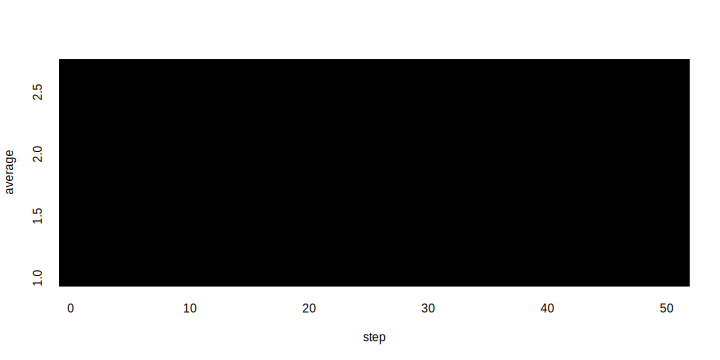

In [28]:
plot (1:50, average, type = "o", xlab="step", ylab = "average")

In [ ]:
# 1 (c) 
g = erdos.renyi.game(1000, 0.01, directed=FALSE)
transition_matrix = create_transition_matrix(g)
end_degree = rep(NA, 1000)
for (t in 1:1000) {
    start = sample(1:1000, 1)
    end_degree[t] = degree(g, random_walk(g, start, t))
}
hist(end_degree)
hist(degree(g))

In [ ]:
# 1 (d)
g = erdos.renyi.game(100, 0.01, directed=FALSE)
transition_matrix = create_transition_matrix(g)
average = rep(NA, 50)
sd = rep(NA, 50)
for (t in 1:50) {
  sPath = rep(NA, 10)
  for (walk in 1:10) {
    start = sample(1:100, 1)
    last = random_walk(g, t, start) # last node
    sPath[walk] = getShortest(g, start, last, transition_matrix)
  }
  sd[t] = sd(sPath)
  average[t] = mean(sPath)
}

plot (1:50, average, type = "o", xlab="step", ylab = "average")
plot(1:50, sd, type = "o", xlab = "step", ylab = "standard deviation")

g = erdos.renyi.game(10000, 0.01, directed=FALSE)
transition_matrix = create_transition_matrix(g)
average = rep(NA, 50)
sd = rep(NA, 50)
for (t in 1:50) {
  sPath = rep(NA, 10)
  for (walk in 1:10) {
    start = sample(1:10000, 1)
    last = random_walk(g, t, start) # last node
    sPath[walk] = getShortest(g, start, last, transition_matrix)
  }
  sd[t] = sd(sPath)
  average[t] = mean(sPath)
}

plot (1:50, average, type = "o", xlab="step", ylab = "average")
plot(1:50, sd, type = "o", xlab = "step", ylab = "standard deviation")

In [ ]:
# 2 a
g = sample_pa(1000, m = 1, directed=FALSE)
transition_matrix = create_transition_matrix(g)

In [ ]:
# 2 b
average = rep(NA, 50)
sd = rep(NA, 50)
for (t in 1:50) {
  sPath = rep(NA, 10)
  for (walk in 1:10) {
    start = sample(1:1000, 1)
    last = random_walk(g, t, start) # last node
    sPath[walk] = getShortest(g, start, last, transition_matrix)
  }
  sd[t] = sd(sPath)
  average[t] = mean(sPath)
}

plot (1:50, average, type = "o", xlab="step", ylab = "average")
plot(1:50, sd, type = "o", xlab = "step", ylab = "standard deviation")


In [3]:
# 2 c
g = sample_pa(1000, m = 1, directed=FALSE)
transition_matrix = create_transition_matrix(g)
end_degree = rep(NA, 1000)
for (t in 1:1000) {
    start = sample(1:1000, 1)
    end_degree[t] = degree(g, random_walk(g, start, t))
}
hist(end_degree)
hist(degree(g))

Error in create_transition_matrix(g): could not find function "create_transition_matrix"




In [ ]:
# 2 d
g = sample_pa(1000, m = 1, directed=FALSE)
transition_matrix = create_transition_matrix(g)
average = rep(NA, 50)
sd = rep(NA, 50)
for (t in 1:50) {
  sPath = rep(NA, 10)
  for (walk in 1:10) {
    start = sample(1:100, 1)
    last = random_walk(g, t, start) # last node
    sPath[walk] = getShortest(g, start, last, transition_matrix)
  }
  sd[t] = sd(sPath)
  average[t] = mean(sPath)
}

plot (1:50, average, type = "o", xlab="step", ylab = "average")
plot(1:50, sd, type = "o", xlab = "step", ylab = "standard deviation")

g = sample_pa(1000, m = 1, directed=FALSE)
transition_matrix = create_transition_matrix(g)
average = rep(NA, 50)
sd = rep(NA, 50)
for (t in 1:50) {
  sPath = rep(NA, 10)
  for (walk in 1:10) {
    start = sample(1:10000, 1)
    last = random_walk(g, t, start) # last node
    sPath[walk] = getShortest(g, start, last, transition_matrix)
  }
  sd[t] = sd(sPath)
  average[t] = mean(sPath)
}

plot (1:50, average, type = "o", xlab="step", ylab = "average")
plot(1:50, sd, type = "o", xlab = "step", ylab = "standard deviation")


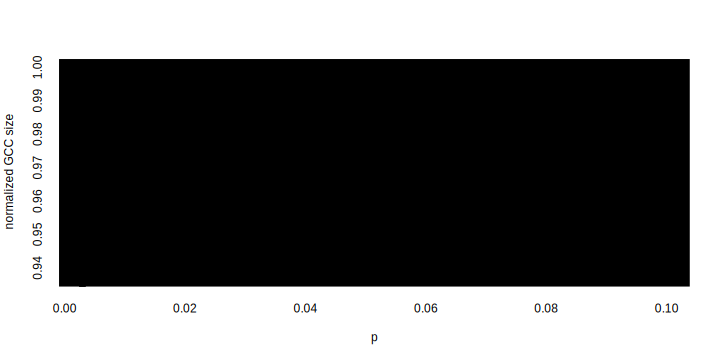

In [17]:
# plot(1:5, 1:5)
# points(1:5, 2:6)
library("igraph")
max = rep(0, 5)
for (j in 1:100) {
  for (i in 1:5) {
    g = erdos.renyi.game(1000, p[i], directed=FALSE)
    g.components <- clusters(g)
    ix <- which.max(g.components$csize)
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    if (max[i] < vcount(g.giant)) max[i] = vcount(g.giant)
  }
}


p = 1:5
y = 1:5
p[1] = 0.003
p[2] = 0.004
p[3] = 0.01
p[4] = 0.05
p[5] = 0.1
for (j in 1:100) {
  for (i in 1:5) {
    g = erdos.renyi.game(1000, p[i], directed=FALSE)
    g.components <- clusters(g)
    ix <- which.max(g.components$csize)
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    y[i] = vcount(g.giant)
  }
    
  if (j == 1) {
    plot(p, y / max[i], xlab="p", ylab="normalized GCC size")
  }
  else {
    points(p, y / max[i], xlab="p", ylab="normalized GCC size")
  }
}

In [23]:
num = 1000
for (i in 1:5) {
  g = erdos.renyi.game(num, p[i], directed=FALSE)
  dg = degree.distribution(g)
  degreeVector = degree(g)
  title = paste("p = ", p[i])
  cat(sprintf("p is %g", p[i]))
  ave = mean(degreeVector)
  variance = var(degreeVector)
  cat(sprintf("average is %g, variance is %g",ave, variance))
}

[1] "p is 0.003"
[1] "average is 2.904, variance is 2.79558"
[1] "p is 0.004"
[1] "average is 4.008, variance is 3.99593"
[1] "p is 0.01"
[1] "average is 9.912, variance is 9.30756"
[1] "p is 0.05"
[1] "average is 50.274, variance is 48.1671"
[1] "p is 0.1"
[1] "average is 99.772, variance is 94.3544"


In [31]:
counts = rep(0, 5)
for (j in 1:1000) {
    for (i in 1:5) {
      g = erdos.renyi.game(num, p[i], directed=FALSE)
      if (is.connected(g)) {
          counts[i] = counts[i] + 1
      }
    }
}
counts = counts / 1000
print(counts)

[1] 0.000 0.000 0.964 1.000 1.000
